In [1]:
pip install eli5


Note: you may need to restart the kernel to use updated packages.Collecting eli5
     -------------------------------------- 216.2/216.2 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 133.2/133.2 kB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 47.1/47.1 kB ? eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107728 sha256=3c005bfae048603e56c660eb05c0618e50b394607c5f5b82d2f26de5afaf79e4
  Stored in directory: c:\users\sridip\appdata\local\pip\cache\wheels\7b\26\a5\8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3



ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.


In [2]:
pip install anaconda-project 0.11.1



SyntaxError: invalid syntax (1130118858.py, line 1)

In [3]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from eli5.sklearn import PermutationImportance

In [5]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [6]:
train['week']=pd.to_datetime(train['week'])
test['week']=pd.to_datetime(test['week'])

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   record_ID        150150 non-null  int64         
 1   week             150150 non-null  datetime64[ns]
 2   store_id         150150 non-null  int64         
 3   sku_id           150150 non-null  int64         
 4   total_price      150149 non-null  float64       
 5   base_price       150150 non-null  float64       
 6   is_featured_sku  150150 non-null  int64         
 7   is_display_sku   150150 non-null  int64         
 8   units_sold       150150 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 10.3 MB


In [8]:
train.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [10]:
train.describe()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
count,150150.000000,150150.000000,150150.000000,150149.000000,150150.000000,150150.000000,150150.000000,150150.000000
mean,106271.555504,9199.422511,254761.132468,206.626751,219.425927,0.095611,0.133200,51.674206
std,61386.037861,615.591445,85547.306447,103.308516,110.961712,0.294058,0.339792,60.207904
min,1.000000,8023.000000,216233.000000,41.325000,61.275000,0.000000,0.000000,1.000000
25%,53111.250000,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000,20.000000
50%,106226.500000,9371.000000,222087.000000,198.075000,205.912500,0.000000,0.000000,35.000000
75%,159452.750000,9731.000000,245338.000000,233.700000,234.412500,0.000000,0.000000,62.000000
max,212644.000000,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000,2876.000000


In [11]:
train

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,20
1,2,2011-01-17,8091,216419,99.0375,99.0375,0,0,28
2,3,2011-01-17,8091,216425,133.9500,133.9500,0,0,19
3,4,2011-01-17,8091,216233,133.9500,133.9500,0,0,44
4,5,2011-01-17,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,2013-09-07,9984,223245,235.8375,235.8375,0,0,38
150146,212639,2013-09-07,9984,223153,235.8375,235.8375,0,0,30
150147,212642,2013-09-07,9984,245338,357.6750,483.7875,1,1,31
150148,212643,2013-09-07,9984,547934,141.7875,191.6625,0,1,12


In [12]:
train.drop(train[train['units_sold']>1500].index,inplace=True)

C:\Users\Sridip\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sridip\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sridip\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

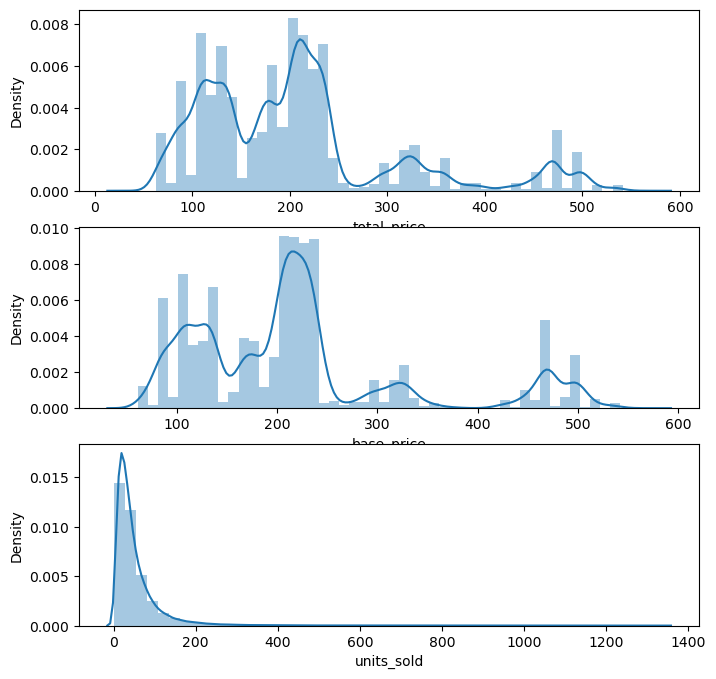

In [15]:
num_cols=['total_price','base_price','units_sold']
fig,ax =plt.subplots(3,1,figsize=(8,8),squeeze=False)
r=0
c=0
for i in num_cols:
    sns.distplot(train[i],ax=ax[r][c])
    r+=1

In [16]:
train['units_sold']=np.log1p(train['units_sold'])

In [18]:
train['total_price']=np.log(train['total_price'])
test['total_price']=np.log(test['total_price'])

In [19]:
train['base_price']=np.log(train['base_price'])
test['base_price']=np.log(test['base_price'])

C:\Users\Sridip\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sridip\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sridip\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

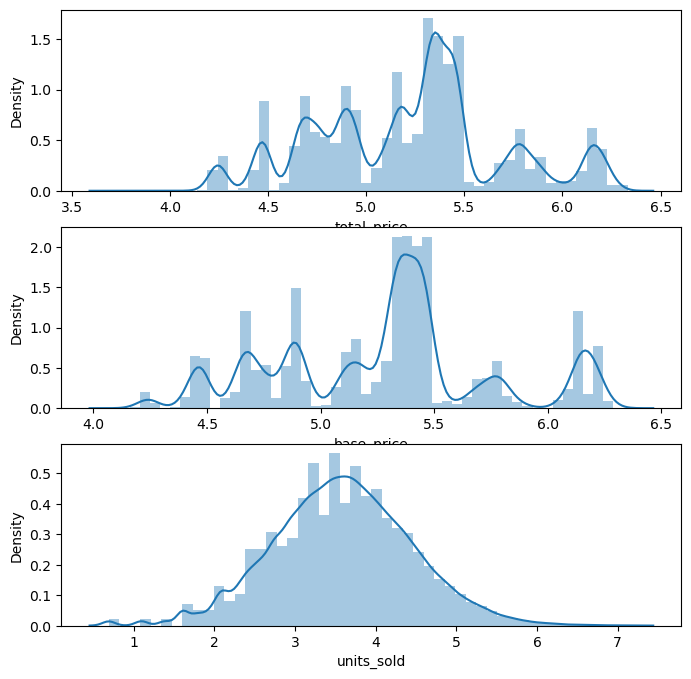

In [20]:
fig,ax = plt.subplots(3,1,figsize=(8,8),squeeze=False)
r=0
c=0
for i in num_cols:
  sns.distplot(train[i],ax=ax[r][c])
  r+=1

In [21]:
train['IsDiscounted'] = np.where(train['total_price']<train['base_price'],1,0)
test['IsDiscounted'] = np.where(test['total_price']<test['base_price'],1,0)

In [22]:
train['Discount'] = train['base_price'] - train['total_price']
test['Discount'] = test['base_price'] - test['total_price']

train['Discount']=np.where(train['Discount'] > 0 ,np.log1p(train['Discount']),0)
test['Discount']=np.where(test['Discount'] > 0 ,np.log1p(test['Discount']),0)

In [23]:
train['Premium'] =  train['total_price'] - train['base_price']
test['Premium'] =  test['total_price'] - test['base_price']
train['Premium']=np.where(train['Premium'] > 0 ,np.log1p(train['Premium']),0)
test['Premium']=np.where(test['Premium'] > 0 ,np.log1p(test['Premium']),0)

C:\Users\Sridip\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [24]:
from pandas import datetime
train['Month'] = [date.month for date in train.week]
test['Month'] = [date.month for date in test.week]

C:\Users\Sridip\AppData\Local\Temp\ipykernel_1872\3403051895.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [25]:
from datetime import datetime
import time
def datetounix(df):
    unixtime = []
    
    for date in df['week']:
        unixtime.append(time.mktime(date.timetuple()))
    df['week'] = unixtime
    return(df)

In [26]:
train = datetounix(train)
test = datetounix(test)

In [27]:
X = train.drop(['units_sold'],axis=1)
y = train['units_sold']

In [28]:
test_final = test

In [29]:
train.head().append(train.tail())

C:\Users\Sridip\AppData\Local\Temp\ipykernel_1872\1356475698.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train.head().append(train.tail())


,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,IsDiscounted,Discount,Premium,Month
0,1,1.295203e+09,8091,216418,4.595499,4.717270,0,0,3.044522,1,0.114909,0.0,1
1,2,1.295203e+09,8091,216419,4.595499,4.595499,0,0,3.367296,0,0.000000,0.0,1
2,3,1.295203e+09,8091,216425,4.897467,4.897467,0,0,2.995732,0,0.000000,0.0,1
3,4,1.295203e+09,8091,216233,4.897467,4.897467,0,0,3.806662,0,0.000000,0.0,1
4,5,1.295203e+09,8091,217390,4.949292,4.949292,0,0,3.970292,0,0.000000,0.0,1
150145,212638,1.378492e+09,9984,223245,5.463143,5.463143,0,0,3.663562,0,0.000000,0.0,9
150146,212639,1.378492e+09,9984,223153,5.463143,5.463143,0,0,3.433987,0,0.000000,0.0,9
150147,212642,1.378492e+09,9984,245338,5.879625,6.181646,1,1,3.465736,1,0.263918,0.0,9
150148,212643,1.378492e+09,9984,547934,4.954329,5.255736,0,1,2.564949,1,0.263446,0.0,9
150149,212644,1.378492e+09,9984,679023,5.457082,5.457082,0,0,2.772589,0,0.000000,0.0,9


In [30]:
test.head().append(test.tail())

C:\Users\Sridip\AppData\Local\Temp\ipykernel_1872\2168019457.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test.head().append(test.tail())


,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,IsDiscounted,Discount,Premium,Month
0,212645,1.373913e+09,8091,216418,4.684905,4.684905,0,0,0,0.000000,0.0,7
1,212646,1.373913e+09,8091,216419,4.691463,4.691463,0,0,0,0.000000,0.0,7
2,212647,1.373913e+09,8091,216425,4.897467,4.897467,0,0,0,0.000000,0.0,7
3,212648,1.373913e+09,8091,216233,4.897467,4.897467,0,0,0,0.000000,0.0,7
4,212649,1.373913e+09,8091,217390,5.174453,5.174453,0,0,0,0.000000,0.0,7
13855,232281,1.357756e+09,9984,223245,5.487025,5.487025,0,0,0,0.000000,0.0,1
13856,232282,1.357756e+09,9984,223153,5.484071,5.484071,0,0,0,0.000000,0.0,1
13857,232285,1.357756e+09,9984,245338,5.947023,5.996079,1,1,1,0.047891,0.0,1
13858,232286,1.357756e+09,9984,547934,5.255736,5.255736,0,0,0,0.000000,0.0,1
13859,232287,1.357756e+09,9984,679023,5.457082,5.457082,0,0,0,0.000000,0.0,1


In [31]:
def train_test_split(k):
   train_size = int(len(train) * k)
   x_tr, y_tr = X[0:train_size], y[0:train_size]
   x_v,y_v = X[train_size:len(X)], y[train_size:len(X)]
   return x_tr,y_tr,x_v,y_v

In [32]:
ratio = [0.88,0.9,0.92,0.94,0.96]

In [37]:
pip install lightgbm 

  Using cached lightgbm-4.3.0-py3-none-win_amd64.whl (1.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [38]:
from lightgbm import LGBMRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_log_error

In [40]:
rmsle = 0
for i in ratio:
  x_train,y_train,x_val,y_val = train_test_split(i)
  lgbc=LGBMRegressor(boosting_type='gbdt',n_estimators=800, learning_rate=0.12,objective= 'regression',n_jobs=-1,random_state=100)
  model=lgbc.fit(x_train,y_train)
  pred_val = model.predict(x_val)
   
  print(np.sqrt(mean_squared_log_error(np.exp(y_val), np.exp(pred_val))))
  rmsle+=np.sqrt(mean_squared_log_error(np.exp(y_val),np.exp(pred_val)))
  print(rmsle/5)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002756 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1476
[LightGBM] [Info] Number of data points in the train set: 132128, number of used features: 12
[LightGBM] [Info] Start training from score 3.589798
0.4402242886774303
0.08804485773548607
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003617 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1477
[LightGBM] [Info] Number of data points in the train set: 135131, number of used features: 12
[LightGBM] [Info] Start training from score 3.588612
0.41141301882599746
0.17032746150068556
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003670 seconds.
You

In [41]:
lgbc.fit(X,y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004969 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1501
[LightGBM] [Info] Number of data points in the train set: 150146, number of used features: 12
[LightGBM] [Info] Start training from score 3.585814


LGBMRegressor(learning_rate=0.12, n_estimators=800, n_jobs=-1,
              objective='regression', random_state=100)

In [42]:
import eli5
perm = PermutationImportance(lgbc,random_state=100).fit(x_val, y_val)
eli5.show_weights(perm,feature_names=x_val.columns.tolist())

Weight,Feature
0.7642 ± 0.0269,sku_id
0.5067 ± 0.0176,store_id
0.4272 ± 0.0252,total_price
0.2180 ± 0.0078,base_price
0.0411 ± 0.0033,is_display_sku
0.0398 ± 0.0041,is_featured_sku
0.0226 ± 0.0016,Discount
0.0122 ± 0.0007,record_ID
0.0055 ± 0.0008,week
0.0051 ± 0.0004,Month


In [43]:
pred = lgbc.predict(test_final)
pred = np.exp(pred)

In [44]:
pred

array([26.33054045, 22.83303723, 25.8594676 , ..., 38.37288829,
       12.15984194, 12.55144166])

In [45]:
pip install catboost

     -------------------------------------- 101.2/101.2 MB 3.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [46]:
from catboost import CatBoostRegressor   
cb = CatBoostRegressor(
    n_estimators = 1000,
    learning_rate = 0.11,
    #iterations=1000,
    loss_function = 'RMSE',
    eval_metric = 'RMSE',
    verbose=0)

In [47]:
rmsle = 0
for i in ratio:
  x_train,y_train,x_val,y_val = train_test_split(i)

  model=cb.fit(x_train,y_train)
  pred_val = model.predict(x_val)
   
  print(np.sqrt(mean_squared_log_error(np.exp(y_val), np.exp(pred_val))))
  rmsle+=np.sqrt(mean_squared_log_error(np.exp(y_val),np.exp(pred_val)))



print("Test set RMSE:",100*rmsle/5)

0.4474892846176127
0.4288293780286156
0.4332488514857303
0.39323905551928295
0.39101045716654376
Test set RMSE: 41.876340536355706


In [48]:
cb.fit(X,y)

In [49]:
import eli5
perm = PermutationImportance(cb,random_state=100).fit(x_val, y_val)
eli5.show_weights(perm,feature_names=x_val.columns.tolist())

Weight,Feature
0.7895 ± 0.0308,sku_id
0.4414 ± 0.0157,store_id
0.4162 ± 0.0184,base_price
0.3983 ± 0.0207,total_price
0.0451 ± 0.0045,is_featured_sku
0.0371 ± 0.0031,is_display_sku
0.0305 ± 0.0021,Discount
0.0073 ± 0.0005,record_ID
0.0042 ± 0.0005,Month
0.0028 ± 0.0004,week


In [50]:
pred_cb = cb.predict(test_final)
pred_cb = np.exp(pred_cb)

In [52]:
pred_cb=cb.predict(test_final)
pred_cb = np.exp(pred_cb)

In [53]:
pred_cb

array([31.54768894, 24.6132978 , 19.23657177, ..., 32.20468761,
       11.63574006, 10.96102527])

In [54]:
pred_final =0.75*pred + 0.25*pred_cb
pred_final

array([27.63482757, 23.27810237, 24.20374364, ..., 36.83083812,
       12.02881647, 12.15383756])

In [55]:
df_solution = pd.DataFrame()
df_solution['record_ID'] = test.record_ID
df_solution['units_sold'] = pred_final
df_solution

,record_ID,units_sold
0,212645,27.634828
1,212646,23.278102
2,212647,24.203744
3,212648,27.447874
4,212649,25.412684
...,...,...
13855,232281,51.030287
13856,232282,37.971768
13857,232285,36.830838
13858,232286,12.028816
